In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
training_set=pd.read_csv('E:/Data Science/Deep Learning/Twitter Classification/train_E6oV3lV.csv')

In [3]:
training_set

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


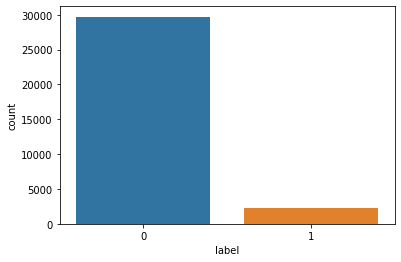

In [4]:
sns.countplot(x=training_set['label'],data=training_set)

In [5]:
test_set=pd.read_csv('E:/Data Science/Deep Learning/Twitter Classification/test_tweets_anuFYb8.csv')

In [6]:
test_set

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [7]:
X=training_set.iloc[:,2]
y=training_set.iloc[:,1]

In [8]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jatin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def convert(data):
  corpus=[]
  for k in range(0,len(data)):
    i=data[k] 
    i=re.sub('[^a-zA-Z0-9\n\@]',' ',i)
    i=i.lower()
    i=i.split()
    ps=PorterStemmer()
    i=[ps.stem(word) for word in i]
    i=' '.join(i)
    i=i.replace('@user','')
    corpus.append(i)
  return corpus

In [10]:
X0=X.apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))

In [11]:
X0_corpus=convert(X0)

In [12]:
X0_corpus

[' when father dysfunct selfish drag kid into dysfunct run',
 '  thank lyft credit can t caus they don t offer wheelchair van pdx disapoint getthank',
 'bihday your majesti',
 'model love take with time ur',
 'factsguid societi motiv',
 '2 2 huge fare talk befor they leav chao disput when they there allshowandnogo',
 ' camp tomorrow        danni',
 'next school year year exam can t think about that school exam hate imagin actorslif revolutionschool girl',
 'won love land allin cav champion cleveland clevelandcavali',
 '  welcom here it s gr8',
 'ireland consum price index mom climb from previou 0 2 0 5 blog silver gold forex',
 'selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love',
 'daddi today 80day gettingf',
 ' cnn call michigan middl school build wall chant tcot',
 'comment australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin',
 'ouch junior angri got7 junior yugyoem omg',
 'thank have paner thank posit',
 'retweet

In [13]:
def word_counts(data):
    frequency = {}
    for i in range(len(data)):
        x = data[i].split()
        for w in x:
            try:
                frequency[w].add(i)
            except:
                frequency[w] = {i}
    for i in frequency:
        frequency[i]=len(frequency[i])
    return frequency

In [14]:
print(word_counts(X0_corpus))

{'when': 1231, 'father': 759, 'dysfunct': 2, 'selfish': 14, 'drag': 19, 'kid': 222, 'into': 200, 'run': 130, 'thank': 1121, 'lyft': 5, 'credit': 17, 'can': 774, 't': 2198, 'caus': 97, 'they': 730, 'don': 645, 'offer': 47, 'wheelchair': 3, 'van': 4, 'pdx': 3, 'disapoint': 1, 'getthank': 2, 'bihday': 714, 'your': 1608, 'majesti': 10, 'model': 393, 'love': 3021, 'take': 726, 'with': 2458, 'time': 1225, 'ur': 327, 'factsguid': 12, 'societi': 32, 'motiv': 219, '2': 89, 'huge': 45, 'fare': 5, 'talk': 167, 'befor': 213, 'leav': 205, 'chao': 8, 'disput': 1, 'there': 551, 'allshowandnogo': 1, 'camp': 60, 'tomorrow': 440, 'danni': 7, 'next': 343, 'school': 221, 'year': 513, 'exam': 34, 'think': 481, 'about': 839, 'that': 1973, 'hate': 261, 'imagin': 45, 'actorslif': 8, 'revolutionschool': 1, 'girl': 613, 'won': 136, 'land': 45, 'allin': 2, 'cav': 34, 'champion': 15, 'cleveland': 24, 'clevelandcavali': 1, 'welcom': 68, 'here': 511, 'it': 1180, 's': 3127, 'gr8': 1, 'ireland': 32, 'consum': 16, 'pr

In [15]:
training_set['modified Tweet']=X0_corpus

In [16]:
training_set['modified Tweet']

0         when father dysfunct selfish drag kid into dy...
1          thank lyft credit can t caus they don t offe...
2                                      bihday your majesti
3                             model love take with time ur
4                                  factsguid societi motiv
                               ...                        
31957                                           that youuu
31958    nina turner airwav tri wrap herself mantl genu...
31959                         listen song monday morn work
31960              sikh templ vandalis calgari wso condemn
31961                                        thank  follow
Name: modified Tweet, Length: 31962, dtype: object

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
cv=CountVectorizer(max_features=100)

In [50]:
X_corpus_vector=cv.fit_transform(X0_corpus).toarray()

In [51]:
X_new=pd.DataFrame(X_corpus_vector)

In [52]:
X_new

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X_new.shape

(31962, 100)

In [54]:
y.shape

(31962,)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.20)

In [57]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [58]:
gnb=GaussianNB()

In [59]:
mnb=MultinomialNB()

In [60]:
bnb=BernoulliNB()

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lgr=LogisticRegression()

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rfc=RandomForestClassifier(n_estimator=100,criterion='entropy')

TypeError: __init__() got an unexpected keyword argument 'n_estimator'

In [65]:
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

C:\Users\Jatin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [66]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)*100

23.741007194244602

In [67]:
from sklearn import metrics 
print(metrics.accuracy_score(y_test, y_pred)*100)

93.36774597215705


In [71]:
from sklearn.model_selection import GridSearchCV
parameters=[{'n_estimators':[10,100,1000],'criterion':['gini', 'entropy']}
            ]
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,scoring='f1',cv=10)
grid_search.fit(X_train,y_train)
best_f1=grid_search.best_score_
best_params=grid_search.best_params_


In [72]:
best_f1

0.24652431329434404

In [73]:
best_params

{'criterion': 'entropy', 'n_estimators': 1000}